In [36]:
import scipy
import matplotlib.pyplot as plt
import numpy as np

A study of how the distribution of bike usage differs during spring and summer. One important question to answer here is whether the distributions for these two seasons are the same or whether they differ. To answer this question, you should look into hypothesis tests that fall in the category of “two-sample tests”. You should use at least two such tests, which should be described in detail and compared (including a discussion of how any underlying assumptions differ!).

In [3]:
from __future__ import annotations
from BikeData import BikeData

In [4]:
daily = BikeData("day.csv")
hourly = BikeData("hour.csv")
spring_summer = daily.subset(leq={"season": 2}, eq={"holiday": 0, "workingday":1})
spring_summer_hour = hourly.subset(leq={"season": 2}, eq={"holiday": 0, "workingday":1})

In [5]:
spring = daily.subset(eq={"season": 1})
summer = daily.subset(eq={"season": 2})
# spring = daily.subset(eq={"season": 1,"holiday": 0, "workingday": 1})
# summer = daily.subset(eq={"season": 2, "holiday": 0, "workingday": 1})

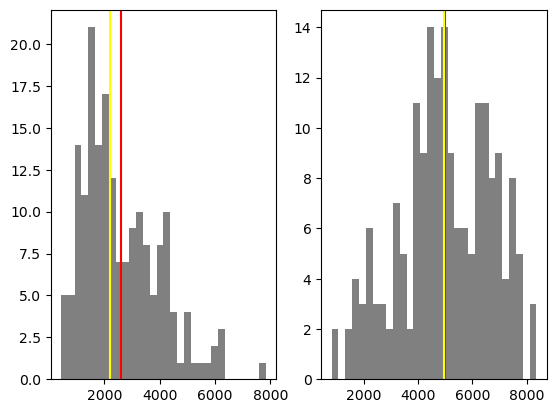

[Spring] mean: 2604.1325966850827, median: 2209.0
[Summer] mean: 4992.33152173913, median: 4941.5


In [59]:
spring_day_count = spring.data["cnt"].to_numpy()
summer_day_count = summer.data["cnt"].to_numpy()

fig, (ax_spring, ax_summer) = plt.subplots(1,2)
ax_spring.hist(spring.data["cnt"], bins=30, color="gray")
ax_spring.axvline(x=np.mean(spring.data["cnt"]),color="red")
ax_spring.axvline(x=np.median(spring.data["cnt"]),color="yellow")

ax_summer.hist(summer.data["cnt"], bins=30, color="gray")
ax_summer.axvline(x=np.mean(summer.data["cnt"]),color="red")
ax_summer.axvline(x=np.median(summer.data["cnt"]),color="yellow")
plt.show()

print(f"[Spring] mean: {np.mean(spring_day_count)}, median: {np.median(spring_day_count)}")
print(f"[Summer] mean: {np.mean(summer_day_count)}, median: {np.median(summer_day_count)}")

From the above plots, we can see that the distribution of bike usage seems to differ during spring and summer by looking at the shapes of the two histograms. The bike usage also have very different mean and median values for Spring and Summer.

**// Not sure if it makes sense to do a quick normality test here (data scope is different from question 1)**

Before we made any choice on which two-sample tests to be used to check whether the two distributions are the same, we will need to understand the individual distribution of the spring and summer a bit better to see if certain assumptions of the two-sample tests do hold.

First, we will test for normality on Spring and Summer data seprately using **Shapiro-Wilk test**.

In [58]:
from scipy.stats import shapiro
w, p_value = shapiro(spring.data['cnt'])
print(f"p-value from Shapiro-Wilk test on Spring's bike usage: {p_value}")
w, p_value = shapiro(summer.data['cnt'])
print(f"p-value from Shapiro-Wilk test on Summer's bike usage: {p_value}")

p-value from Shapiro-Wilk test on Spring's bike usage: 4.983251642443065e-07
p-value from Shapiro-Wilk test on Summer's bike usage: 0.007908129133284092


Knowing that the p-value obtained from the Shapiro-Wilk test is smaller than 0.05 and observing the shape of the histogram visualisation, we can conclude that neither Spring or Summer bike usage is normally distributed.

## Moody's Median Test

We chose to run the Moody's Median test because of the following reasons:
1. The test does not require the assumption of normality
3. It can be applied to both small and large samples. The power increases with sample size.

We define the null hypothesis as follows:

$H_0$: Bike usage distributions during Spring and Summer have the same median.

$H_1$: Bike usage distributions during Spring and Summer do not have the same median.

In [66]:
from scipy.stats import median_test
stat, p, med, tbl = median_test(spring_day_count,summer_day_count)
print(p)

2.3153679014005666e-28


By examinating the p-value (which is significantly small than 0.05), we can confidently reject $H_0$ and conclude that the bike usage distribution has different median during Spring and Summer.

## Mann-Whitney U Test

We chose to run the Mann-Whitney U test because of the following reasons:
1. The test does not require the assumption of normality
2. The test works for distribution with different means and medians
3. It can be applied to both small and large samples. The power increases with sample size.

In [ ]:
from scipy.stats import mannwhitneyu
U_test_statistics, p_value = mannwhitneyu(spring_day_count,summer_day_count)
print(U_test_statistics)
print(p_value)